In [1]:
import cv2                   # OpenCV para manipulação de imagens.
import numpy as np                   # Numpy para manipulação de matrizes e arrays.
import matplotlib.pyplot as plt      # Pyplot para plotagem de gráficos e imagens.
import random


In [2]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output



In [10]:
img_in = cv2.imread('letra.jpg',0)

img_in = cv2.cvtColor(img_in, cv2.COLOR_BGR2RGB)
g1 = np.zeros (img_in.shape, img_in.dtype)
g2 = np.zeros (img_in.shape, img_in.dtype)
g3 = np.zeros (img_in.shape, img_in.dtype)

g= img_in
im1= cv2.intensity_transform.contrastStretching(img_in,g1,0,255,255,0)
im2= cv2.intensity_transform.contrastStretching(img_in,g2,10,100,0,10)
im3= cv2.intensity_transform.gammaCorrection(img_in,g3,16)

%matplotlib inline
figG= plt.figure(figsize=(5, 5))


<Figure size 360x360 with 0 Axes>

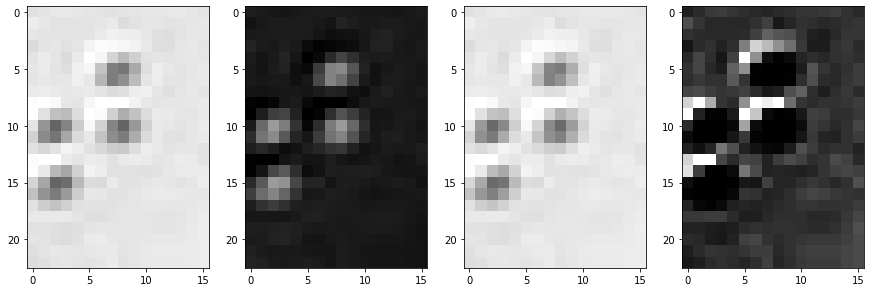

In [11]:
figG, aux = plt.subplots(nrows = 1, ncols = 4, figsize=(15, 10))
aux[0].imshow(g)
aux[1].imshow(g1)
aux[2].imshow(g2)
aux[3].imshow(g3)

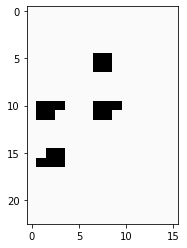

In [12]:



th, im_th = cv2.threshold(img_in, 160, 250, cv2.THRESH_BINARY)

plt.imshow(im_th)


NameError: name 'im' is not defined

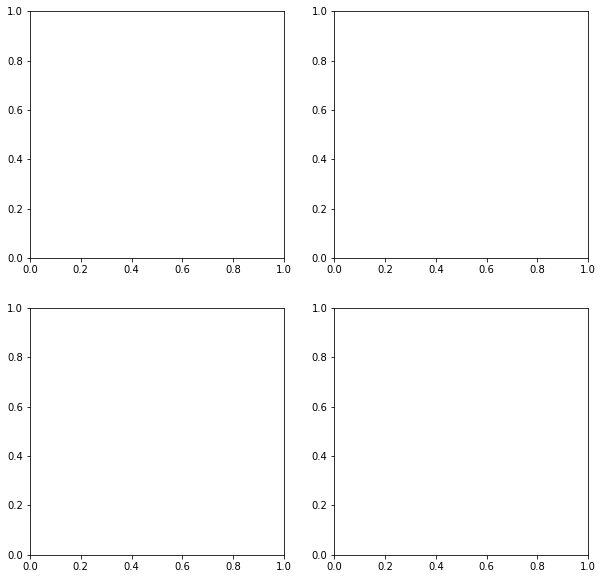

In [6]:

    
im1 = img_in.astype(np.int16)
    
# filter kernel    
gx = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
gy = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

#filter
Gx = abs(cv2.filter2D(im1,-1,gx))
Gy = abs(cv2.filter2D(im1,-1,gy))
im_out = Gx+Gy

Gx = Gx.astype(np.uint8)
Gy = Gy.astype(np.uint8)
im_out = im_out.astype(np.uint8)

#show image
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axs[0,0].imshow(im)
axs[0,0].set_title("Imagem original", size=15)
axs[0,1].imshow(Gx)
axs[0,1].set_title("Imagem filtrada com o filtro $g_x$",size=15)
axs[1,0].imshow(Gy)
axs[1,0].set_title("Imagem filtrada com o filtro $g_x$",size=15)
axs[1,1].imshow(im_out)
axs[1,1].set_title("Imagem filtrada com o filtro $|Gx|+|Gy|$",size=15)